**INTRODUCTION**

The YellowTrip dataset captures essential information about taxi trips, providing a comprehensive view of various aspects of taxi services. The dataset includes the following columns:

* trip_distance: The distance of the trip in miles.
* fare_amount: The fare amount for the trip.
* passenger_count: The number of passengers on the trip.
* payment_type: The method of payment (e.g., cash, credit card).
* duration: The duration of the trip in minutes.



**Problem_Statemet:**To increase the revenue of cab driver on the bases of payment type.



**Importing** **Laibrary**

In [2]:
# prompt: laibrary importing

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading** **Dataset**

In [3]:
# loading csv file of car trip data

df=pd.read_csv('/content/yellow_tripdata_2019-01_short.csv')
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


In [4]:
df.shape

(6499, 18)

In [5]:
# check datatype for all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               6499 non-null   int64  
 1   tpep_pickup_datetime   6499 non-null   object 
 2   tpep_dropoff_datetime  6499 non-null   object 
 3   passenger_count        6499 non-null   int64  
 4   trip_distance          6499 non-null   float64
 5   RatecodeID             6499 non-null   int64  
 6   store_and_fwd_flag     6499 non-null   object 
 7   PULocationID           6499 non-null   int64  
 8   DOLocationID           6499 non-null   int64  
 9   payment_type           6499 non-null   int64  
 10  fare_amount            6499 non-null   float64
 11  extra                  6499 non-null   float64
 12  mta_tax                6499 non-null   float64
 13  tip_amount             6499 non-null   float64
 14  tolls_amount           6499 non-null   float64
 15  impr

In [6]:
# Converting the object datatype into datetime datatype

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [7]:
# Calculating the duration time by subtracting the value of column dropoff_datetime or pickup_datetime

df['duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [8]:
# Convert time the value of duration columns into minutes/seconds

df['duration']=df['duration'].dt.total_seconds()/60

In [9]:
df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,duration
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.666667
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.200000
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN,4.166667
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN,3.333333
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN,1.600000


In [10]:
# Extracting the required columns from the orignal dataset

df=df[['trip_distance','fare_amount','passenger_count','payment_type','duration']]

In [11]:
df

,trip_distance,fare_amount,passenger_count,payment_type,duration
0,1.50,7.0,1,1,6.666667
1,2.60,14.0,1,1,19.200000
2,0.00,4.5,3,1,4.166667
3,0.00,3.5,5,2,3.333333
4,0.00,52.0,5,2,1.600000
...,...,...,...,...,...
6494,1.59,11.5,2,1,17.083333
6495,1.90,8.5,4,2,8.100000
6496,0.90,6.0,1,2,6.016667
6497,1.30,6.0,3,2,3.700000


In [12]:
# Finding the Null_Value

df.isnull().sum()

trip_distance      0
fare_amount        0
passenger_count    0
payment_type       0
duration           0
dtype: int64

In [13]:
# Finding the duplicate value

df[df.duplicated()]

,trip_distance,fare_amount,passenger_count,payment_type,duration
698,0.90,5.0,1,1,4.116667
908,1.00,6.0,1,2,5.300000
1350,0.80,5.0,1,1,4.466667
1434,2.00,8.0,1,1,6.700000
1611,0.90,6.0,1,1,6.533333
2119,1.50,7.0,1,2,6.483333
2559,2.10,8.0,1,2,6.783333
2645,1.20,6.0,1,1,4.933333
2778,1.70,8.0,4,1,8.166667
2946,0.60,5.0,1,1,4.483333


In [14]:
# Removing the duplicate data from the dataset

df.drop_duplicates(inplace=True)

In [15]:
df.head(5)

,trip_distance,fare_amount,passenger_count,payment_type,duration
0,1.5,7.0,1,1,6.666667
1,2.6,14.0,1,1,19.200000
2,0.0,4.5,3,1,4.166667
3,0.0,3.5,5,2,3.333333
4,0.0,52.0,5,2,1.600000


In [16]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.573548
2    0.236557
3    0.068912
5    0.048980
4    0.036619
6    0.026267
0    0.009116
Name: proportion, dtype: float64

In [17]:
df=df[df['passenger_count']>0]
df=df[df['payment_type']<3]

In [18]:
df['passenger_count'].value_counts(normalize=True)

passenger_count
1    0.577697
2    0.239226
3    0.069991
5    0.049701
4    0.036804
6    0.026581
Name: proportion, dtype: float64

In [19]:
df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [20]:
df.sample(5)

,trip_distance,fare_amount,passenger_count,payment_type,duration
3158,5.49,22.0,1,Card,25.583333
5044,1.80,11.5,1,Card,16.766667
4170,1.36,11.0,6,Card,16.366667
4113,1.24,6.5,1,Cash,6.983333
4737,2.58,11.5,3,Card,13.116667


In [21]:
df.describe()

,trip_distance,fare_amount,passenger_count,duration
count,6358.000000,6358.000000,6358.000000,6358.000000
mean,2.807987,12.441570,1.821327,19.522216
std,3.030780,9.544169,1.278999,90.168939
min,0.000000,-52.000000,1.000000,0.000000
25%,1.040000,6.500000,1.000000,6.600000
50%,1.880000,10.000000,1.000000,11.483333
75%,3.400000,15.500000,2.000000,18.783333
max,44.100000,160.000000,6.000000,1438.800000


In [22]:
df[df['fare_amount']>0]
df[df['trip_distance']>0]
df[df['duration']>0]

,trip_distance,fare_amount,passenger_count,payment_type,duration
0,1.50,7.0,1,Card,6.666667
1,2.60,14.0,1,Card,19.200000
2,0.00,4.5,3,Card,4.166667
3,0.00,3.5,5,Cash,3.333333
4,0.00,52.0,5,Cash,1.600000
...,...,...,...,...,...
6494,1.59,11.5,2,Card,17.083333
6495,1.90,8.5,4,Cash,8.100000
6496,0.90,6.0,1,Cash,6.016667
6497,1.30,6.0,3,Cash,3.700000


In [23]:
# Extracting the discriptive statistical information for numarical columns

df.describe()

,trip_distance,fare_amount,passenger_count,duration
count,6358.000000,6358.000000,6358.000000,6358.000000
mean,2.807987,12.441570,1.821327,19.522216
std,3.030780,9.544169,1.278999,90.168939
min,0.000000,-52.000000,1.000000,0.000000
25%,1.040000,6.500000,1.000000,6.600000
50%,1.880000,10.000000,1.000000,11.483333
75%,3.400000,15.500000,2.000000,18.783333
max,44.100000,160.000000,6.000000,1438.800000


In [24]:
#using IQR method for removing outliers

for col in['fare_amount','trip_distance','duration']:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  IQR=q3=q1
  lower_limit = q1-1.5*IQR
  upper_limit = q3+1.5*IQR
  df=df[(df[col]>=lower_limit) & (df[col]<=upper_limit)]

In [25]:
df.sample(5)

,trip_distance,fare_amount,passenger_count,payment_type,duration
5181,0.94,5.5,1,Cash,5.483333
4956,1.00,6.0,1,Card,6.850000
1480,0.70,5.0,1,Card,4.633333
5839,1.15,7.0,1,Card,7.766667
1993,0.88,6.0,1,Cash,6.000000


Visualization part and data driven

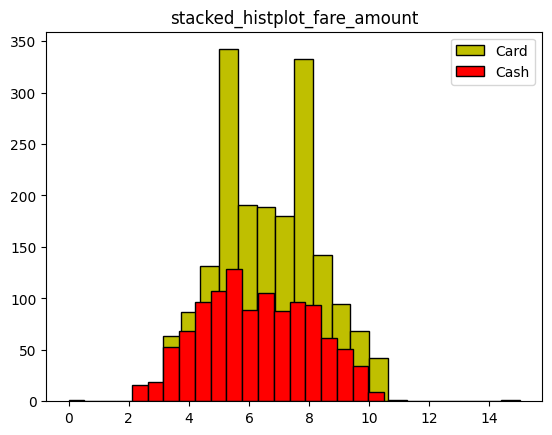

In [26]:
plt.subplot()
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',edgecolor='k',bins=20,color='y',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',edgecolor='k',bins=20,color='r',label='Cash')
plt.title('stacked_histplot_fare_amount')
plt.legend()
plt.show()

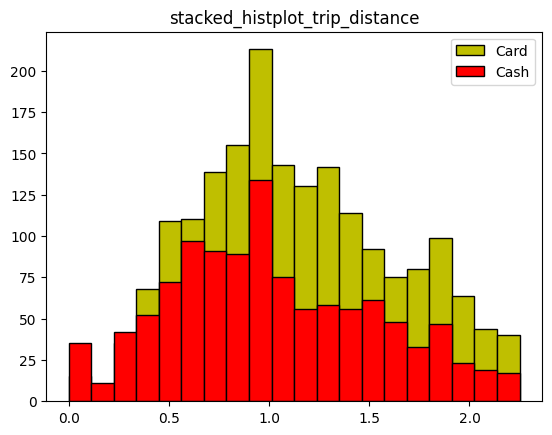

In [27]:
plt.subplot()
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',edgecolor='k',bins=20,color='y',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',edgecolor='k',bins=20,color='r',label='Cash')
plt.title('stacked_histplot_trip_distance')
plt.legend()
plt.show()


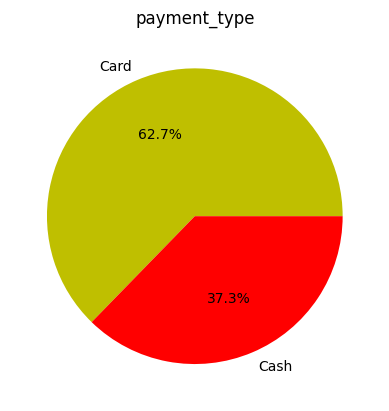

In [28]:
plt.pie(df['payment_type'].value_counts(),labels=df['payment_type'].value_counts().index,colors=['y','r'],autopct='%0.1f%%')
plt.title('payment_type')
plt.show()

In [29]:
from itertools import groupby
#PASSENGER_COUNT_ANALYSIS

passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)
passenger_count

,payment_type,passenger_count,count
0,Card,1,1097
1,Card,2,469
2,Card,3,123
3,Card,4,71
4,Card,5,86
5,Card,6,31
6,Cash,1,674
7,Cash,2,242
8,Cash,3,82
9,Cash,4,38


In [30]:
passenger_count['perc']=(passenger_count['count']/passenger_count['count'].sum())*100

In [31]:
passenger_count

,payment_type,passenger_count,count,perc
0,Card,1,1097,36.652188
1,Card,2,469,15.669896
2,Card,3,123,4.109589
3,Card,4,71,2.372202
4,Card,5,86,2.873371
5,Card,6,31,1.035750
6,Cash,1,674,22.519211
7,Cash,2,242,8.085533
8,Cash,3,82,2.739726
9,Cash,4,38,1.269629


In [32]:
# prompt: create df

df1 = pd.DataFrame(columns=['payment_type',1,2,3,4,5,6])
df1['payment_type']=['Card','Cash']
df1.iloc[0,1:]=passenger_count.iloc[0:6,-1]
df1.iloc[1,1:]=passenger_count.iloc[6:,-1]
df1

,payment_type,1,2,3,4,5,6
0,Card,36.652188,15.669896,4.109589,2.372202,2.873371,1.03575
1,Cash,22.519211,8.085533,2.739726,1.269629,1.470097,1.202807


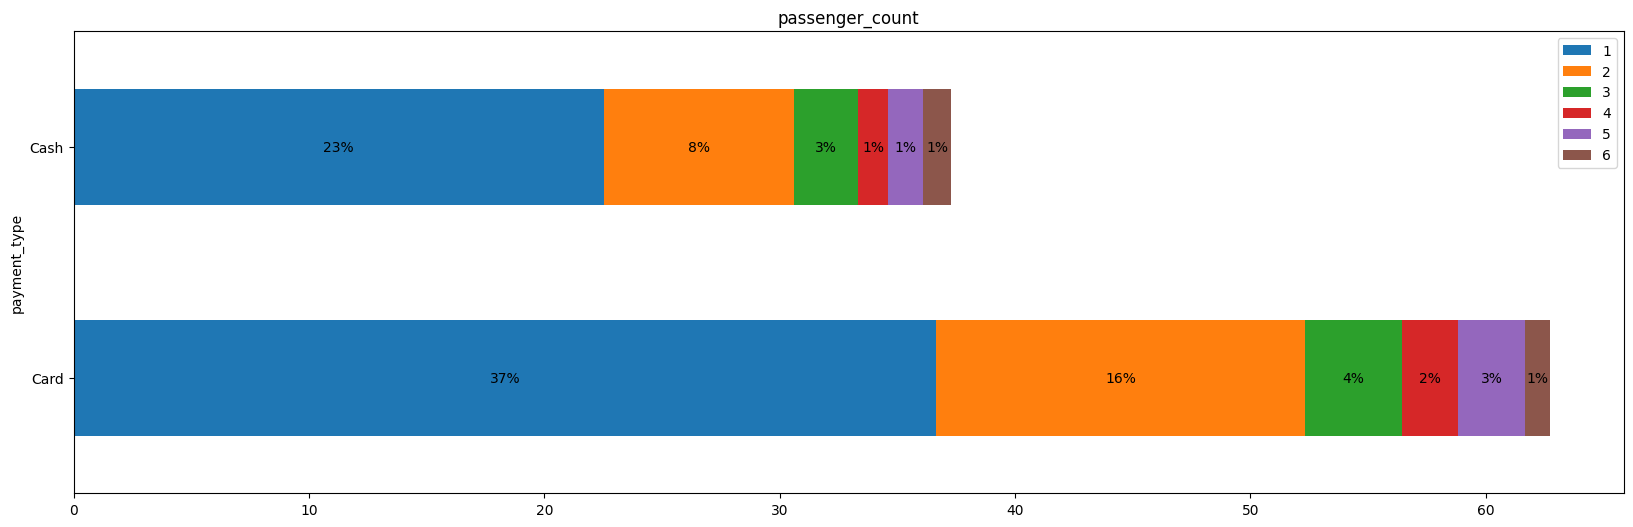

In [33]:
fig,ax = plt.subplots(figsize=(20,6))
df1.plot(x='payment_type',kind='barh',stacked=True,ax=ax)

plt.title('passenger_count')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x+width/2,
            y+height/2,
            '{:.0f}%'.format(width),
            horizontalalignment='center',
            verticalalignment='center')


**Hypothesis testing**

**Null Hypothesis** : There is no diffrence in average fare between customers who use credit card or cash.

**Alternative Hypothesis** : There is a diffrence in average fare between customers who use credit card or cash.

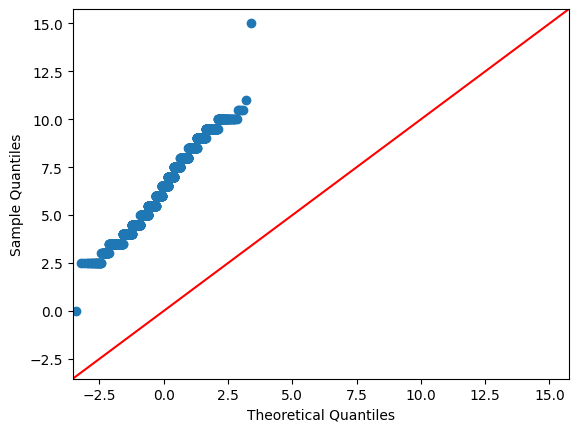

In [34]:
# now we are check the distribution is normal distribution or not

import statsmodels.api as sm

sm.qqplot(df['fare_amount'], line = '45')
plt.show()

**Observation :** In the above plot the blue line is not lies on the red line which mean the distribultion is not a normal distribution

In [35]:
df

,trip_distance,fare_amount,passenger_count,payment_type,duration
0,1.50,7.0,1,Card,6.666667
2,0.00,4.5,3,Card,4.166667
3,0.00,3.5,5,Cash,3.333333
5,0.00,3.5,5,Cash,2.616667
7,1.30,6.5,1,Card,7.150000
...,...,...,...,...,...
6491,0.84,6.0,1,Card,6.466667
6493,1.13,6.5,2,Cash,6.516667
6495,1.90,8.5,4,Cash,8.100000
6496,0.90,6.0,1,Cash,6.016667


In [36]:
card_sample = df[df['payment_type']=='Card']['fare_amount']
cash_sample = df[df['payment_type']=='Cash']['fare_amount']

In [37]:
import scipy.stats as st

t_stats, p_value = st.ttest_ind(a=card_sample, b=cash_sample, equal_var = False )
print('T statistic', t_stats, 'p_value', p_value)

T statistic 5.809979654695457 p_value 7.124077366299103e-09


Conclusion : So, the conclusion is null hypotheses is accepted as p_value is greater than 0.05